# Data Challenge Aquitaine - Les Loustiques  <img src="https://wio.blob.core.windows.net/gallery/carsat-bretagne/original/b4327126-87ec-4c10-8e91-a5273a567a80/rh030_b_carre_nuage_500x500.jpg" style="width : 400px; float : right"/>

**Equipe  :** Auriane GUÉDEZ, Baptiste BOUGOÜIN & Ludovic FRINGAN

---


## Table des matières <a class="anchor" id="s"></a>

* [1. Importation des librairies utiles](#1.)
* [2. Importation des données](#2.)
    * [2.1. Données clients](#2.1.)
    * [2.2. Données jobbeurs](#2.2.)
* [3. Pré traitement des données](#3.)
    * [3.1. Nettoyage](#3.1.)
        * [3.1.1. Données clients](#3.1.1.)
        * [3.1.2. Données jobbeurs](#3.1.2.)
        
## 1. Importation des librairies utiles ([Sommaire](#s)) <a class="anchor" id="1."></a>
Dans cette première partie, il s'agit simplement d'importer les librairies que nous utiliserons pour avoir à disposition des fonctions et des structures objets pratiques.

In [630]:
import sys
import time
import numpy as np
import pandas as pd
import unidecode 
from tqdm.notebook import tqdm

sys.path.append('Scripts')
sys.path.append('Sources')
from params_data import *
import func as fc

import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%load_ext jupyternotify

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

## 2. Importation des données ([Sommaire](#s)) <a class="anchor" id="2."></a>
Ensuite nous récupérons les données depuis des fichiers `.xlsx`.

### 2.1. Données clients <a class="anchor" id="2.1."></a>

In [5]:
df_clt = pd.read_excel('Data/DATA CLIENT.xlsx', header=6).reset_index(drop=True)
display(df_clt.head())
print('\nDimensions des données :\n- {} lignes (observations)\n- {} colonnes (variables)'.format(df_clt.shape[0], 
                                                                                                df_clt.shape[1]))

,Métier du poste,Plusieurs personnes recherchées,Quels types de contrats pour les embauchés - TEXTE,Connaissez vous la différence de ces contrats ?,"Si non, souhaitez-vous vous plus d'informations ?",Temps de travail,niveau de rémunération,Localisation du poste,Mobilité,Taille entreprise,...,Télétravail ( en %),Poste avec du déplacement (en %) si 75 ramené a 100%,un site internet,Cv obligatoire,nom,prénom,nom entreprise,adresse du siège,siret de l'entreprise,code NAF
0,MANUTENTIONNAIRE,oui,Contrat aidé ou aménagé (travailleur handicapé),Tout les autres,Blog,1.0,2050.0,ABIDOS,Permis de conduire,TPE (1 à 10),...,100.0,0.0,NaN,oui,LUCAZEAU,MARGALDO,CJS,ARTHEZ DE BEARN,5.092268e+08,8130Z
1,MANUTENTIONNAIRE,non,Temps partagé,"Uniquement : CDI, CDD, Intérim, stage, alternance",Vidéo,1.0,2000.0,ABIDOS,Transports en commun,TPE (1 à 10),...,75.0,25.0,NaN,non,BARCO,Frederic,REY-BETBEDER,LACQ,3.060009e+08,4399C
2,MANUTENTIONNAIRE,non,bénévolat,"Uniquement : CDI, CDD, Intérim, stage, alternance",Mail,1.0,1750.0,ABOS,Transports en commun,PME (10 à 50),...,100.0,100.0,NaN,non,LARTHET,Graziella,JV PEINTURE,MAZEROLLES,4.915981e+08,4334Z
3,Serveuse,non,militaire,Tout les autres,Mail,1.0,1800.0,ABOS,Permis de conduire,PME (10 à 50),...,0.0,75.0,NaN,non,AUDEBERT,Aurelie,LAFONT TRAVAUX PUBLICS,ORTHEZ,9.708069e+07,0161Z
4,MANOEUVRE,oui,VDI (vendeur à domicile indépendant),"Uniquement : CDI, CDD, Intérim, stage, alternance",Blog,1.0,2100.0,ABOS,Voiture,PME (10 à 50),...,100.0,25.0,NaN,oui,ESQUERRE PATURAUD,Jérôme,LE FROID PYRENEEN,LONS,4.090956e+08,0161Z



Dimensions des données :
- 501 lignes (observations)
- 24 colonnes (variables)


### 2.2. Données jobbeurs <a class="anchor" id="2.2."></a>

In [6]:
df_job = pd.read_excel('Data/DATA JOBEUR.xlsx', header=6).reset_index(drop=True)
display(df_job)
print('\nDimensions des données :\n- {} lignes (observations)\n- {} colonnes (variables)'.format(df_job.shape[0], 
                                                                                                 df_job.shape[1]))

,NOM,Prénom,CODE POSTAL,VILLE,Dernier poste occupé (ou actuel),GENRE,Mission recherchée : Exemple n°1 de poste (métier + secteur),Quels sont vos niveaux de disponibilité ? TEXTE,Quels sont vos niveaux de disponibilité 2? TEXTE,Niveau de rémunération mensuelle brute souhaitée,...,"Si non, souhaitez-vous vous plus d'informations ?",Vous souhaitez faire du télétravail (en % temps),0- 20klm,21- 40klm,41-60klm,61 - klm et plus,Seriez-vous prêt à déménager pour ce futur job ?,Vous êtes prêt à faire des déplacements professionnels (en % temps),"Si vous avez un profil Linkedin ou un e-CV, coller le lien URL :","Si vous avez un site internet, blog ou portfolio coller le lien URL"
0,HERZOG,Patrick,64230,SAUVAGNON,AGENT ADMINISTRATIF,H,AGENT ADMINISTRATIF,1.0,1.0,2280,...,oui,100,NaN,oui,non,non,oui,25,NaN,NaN
1,MATHIS,JONATHAN,64870,ESCOUT,AGENT DE NETTOYAGE,H,AGENT DE NETTOYAGE,1.0,1.0,2320,...,non,25,oui,non,non,non,non,50,NaN,NaN
2,MENAGER,Kevin,64270,SALIES-DE-BEARN,Agent de Précontrainte,H,Agent de Précontrainte,1.0,1.0,1940,...,oui,75,oui,non,non,non,oui,50,NaN,NaN
3,RAMOS,Frederic,64000,PAU,AGENT DE PRODUCTION,H,AGENT DE PRODUCTION,1.0,1.0,2160,...,oui,75,NaN,oui,oui,oui,oui,50,NaN,NaN
4,BAH,Mamadou Dian,64370,DOAZON,AGENT DE SECURITE,H,AGENT DE SECURITE,0.8,0.8,2120,...,oui,75,NaN,oui,oui,oui,oui,25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,BEURNIER,Bruno,64000,PAU,Serveuse,H,Serveuse,1.0,1.0,2560,...,oui,75,NaN,oui,oui,non,oui,25,NaN,NaN
995,POUMIROU,Emilie,64230,DENGUIN,SOUDEUR,F,SOUDEUR,1.0,1.0,2260,...,oui,25,NaN,oui,non,non,oui,25,NaN,NaN
996,RODRIGUES,Jonatan,64300,ORTHEZ,TUYAUTEUR,H,TUYAUTEUR,1.0,1.0,2520,...,oui,25,NaN,oui,oui,oui,oui,25,NaN,NaN
997,PRADE,Karine,64230,LESCAR,VENDEUR,F,VENDEUR,1.0,1.0,1880,...,oui,25,NaN,oui,non,non,oui,50,NaN,NaN



Dimensions des données :
- 999 lignes (observations)
- 40 colonnes (variables)


## 3. Pré traitement des données ([Sommaire](#s)) <a class="anchor" id="3."></a>

### 3.1. Nettoyage <a class="anchor" id="3.1."></a>

A partir d'une visualisation de la complétude des données (avec taux de valeurs manquantes par colonnes) et d'un choix du groupe d'anonymiser nos jeux.

#### 3.1.1. Données clients <a class="anchor" id="3.1.1."></a>

Dans un premier temps, visualisons la complétude des données :

Jaune : Valeur présente
Bleu  : Valeur manquante


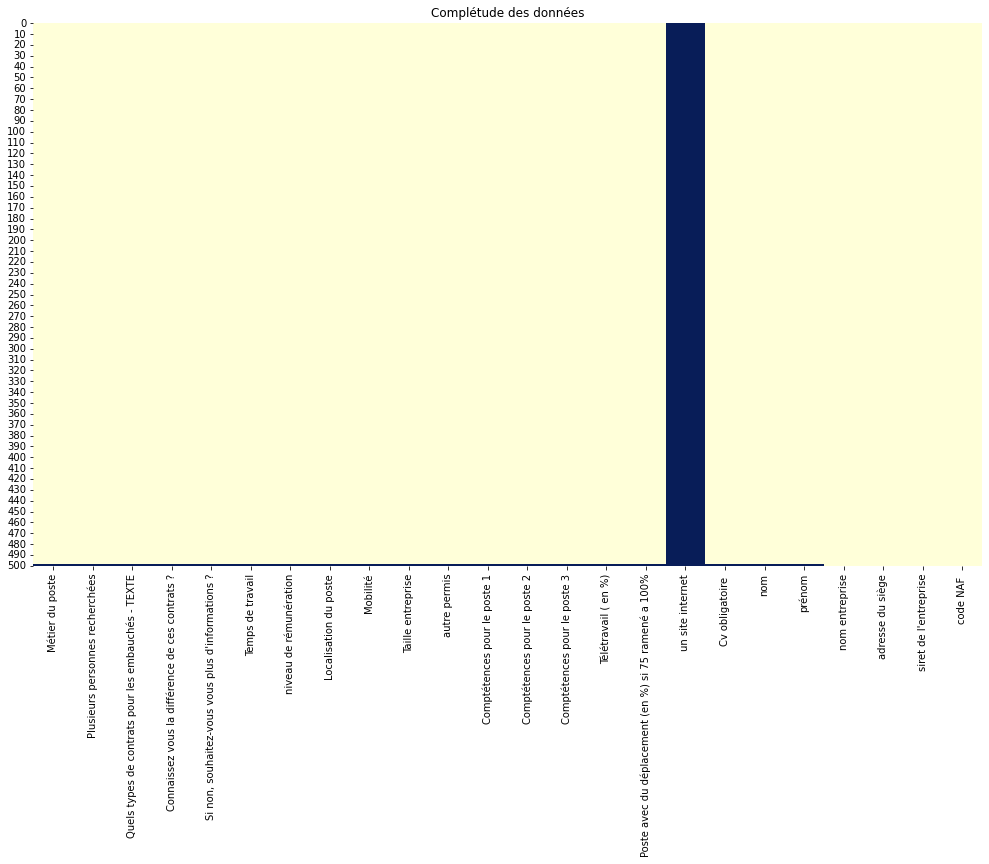

In [7]:
print('Jaune : Valeur présente\nBleu  : Valeur manquante')

plt.figure(figsize=(17, 10))
sns.heatmap(df_clt.isna(), cmap='YlGnBu', cbar=False)
plt.title('Complétude des données')
plt.show()

Affichons aussi le nombre de valeurs uniques par colonnes :

In [8]:
display(pd.DataFrame(df_clt.nunique(axis=0), columns=['Nombre de valeurs uniques']))

,Nombre de valeurs uniques
Métier du poste,120
Plusieurs personnes recherchées,2
Quels types de contrats pour les embauchés - TEXTE,22
Connaissez vous la différence de ces contrats ?,2
"Si non, souhaitez-vous vous plus d'informations ?",3
Temps de travail,4
niveau de rémunération,10
Localisation du poste,154
Mobilité,4
Taille entreprise,4


Nous pouvons voir que la colonne **`un site internet`** ne possède aucune information. Le visuel graphique nous permet de décider de la supprimer sans perte d'information. De plus, nous allons supprimer : 
- les colonnes :
    - **`nom`** et **`prénom`** par soucis d'anonymisation ;
    - **`siret de l'entreprise`** car elle est directement liée à la colonne **`nom entreprise`** et n'apporte donc aucune information ;
- les 2 dernières lignes qui contiennent principalement des valeurs manquantes.

Toutes les colonnes possèdant au moins 2 valeurs uniques, nous pouvons les conserver car elles apportent de l'information.

Notre jeu semble bien nettoyé quant à la complétude et valeur ajoutée statistique.

In [9]:
df_clt = df_clt.drop(['un site internet', 'nom', 'prénom', "siret de l'entreprise"], axis=1).iloc[:-2]
print('Nouvelles dimensions des données :\n- {} lignes (observations)\n- {} colonnes (variables)'.format(df_clt.shape[0],
                                                                                                         df_clt.shape[1]))

Nouvelles dimensions des données :
- 499 lignes (observations)
- 20 colonnes (variables)


#### 3.1.2. Données jobbeurs <a class="anchor" id="3.1.2."></a>

Jaune : Valeur présente
Bleu  : Valeur manquante


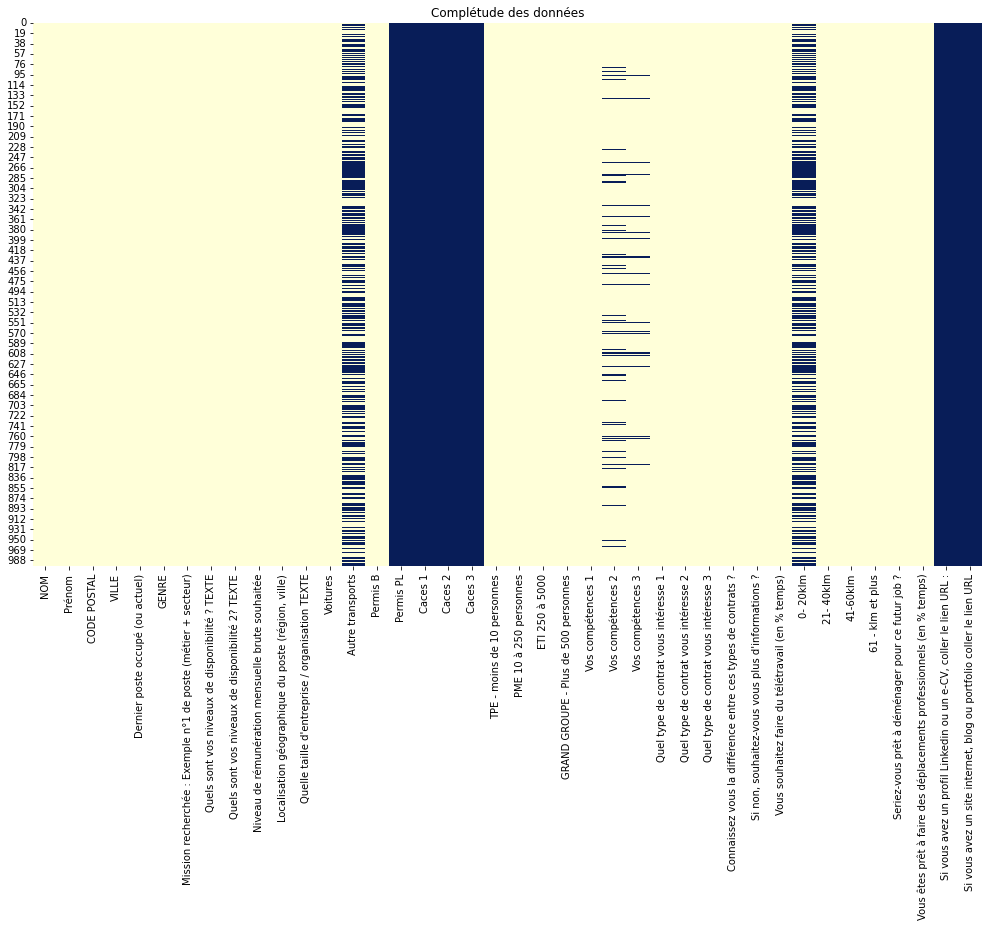

In [10]:
print('Jaune : Valeur présente\nBleu  : Valeur manquante')

plt.figure(figsize=(17, 10))
sns.heatmap(df_job.isna(), cmap='YlGnBu', cbar=False)
plt.title('Complétude des données')
plt.show()

Affichons aussi le nombre de valeurs uniques par colonnes :

In [11]:
display(pd.DataFrame(df_job.nunique(axis=0), columns=['Nombre de valeurs uniques']))

,Nombre de valeurs uniques
NOM,894
Prénom,540
CODE POSTAL,76
VILLE,231
Dernier poste occupé (ou actuel),176
GENRE,2
Mission recherchée : Exemple n°1 de poste (métier + secteur),176
Quels sont vos niveaux de disponibilité ? TEXTE,4
Quels sont vos niveaux de disponibilité 2? TEXTE,4
Niveau de rémunération mensuelle brute souhaitée,50


Nous pouvons voir que les colonnes **`Permis PL`**, **`Caces 1`**, **`Caces 2`**, **`Caces 3`**, **`Si vous avez un profil Linkedin ou un e-CV, coller le lien URL :`** et **`Si vous avez un site internet, blog ou portfolio coller le lien URL`** ne possèdent aucune information. Le visuel graphique nous permet de décider de les supprimer sans perte d'information. De plus, nous allons supprimer les colonnes **`NOM`** et **`Prénom`** par soucis d'anonymisation.

Nous pouvons aussi voir que les colonnes **`Quel type de contrat vous intéresse 1`** et **`0- 20klm`** ne possèdent qu'une valeur unique. Après réflexion sur leur utilité dans les données, nous choisissons de les supprimer car elle n'apporte aucune valeur statistique pour nos futurs calculs. Au contraire, elles pourraient rendre impossible certains calculs. On veillera avec de nouvelles données à les réintégrer afin d'en conserver l'information métier importante.

Nous supprimons de plus la dernière ligne du dataset car elle contient principalement des valeurs manquantes.

In [371]:
df_clt = pd.read_excel('Data/DATA CLIENT.xlsx', header=6).reset_index(drop=True)
df_job = pd.read_excel('Data/DATA JOBEUR.xlsx', header=6).reset_index(drop=True)

df_clt_clean, df_job_clean = fc.clean_data(df_clt, df_job)

------------------- NETTOYAGE COMPLET DES DONNEES -------------------

Suppression des colonnes de la table client ... fini en 0.001s 
Suppression des lignes de la table client ... fini en 0.0s 
Suppression des colonnes de la table jobbeur ... fini en 0.0s 
Suppression des lignes de la table jobbeur ... fini en 0.0s 
Nettoyage des doublons dans les variables client ... fini en 0.003s 
Nettoyage des doublons dans les variables jobbeur ... fini en 0.01s 
Complétion des données dans les variables jobbeur ... fini en 0.001s 

Opération complète terminée en 0.016s


# Mise en place du dataframe

## Merge des données clt-job et One Hot Encoding

In [372]:
col_del, df_dum = fc.merge_one_hot_encoding(df_clt_clean, df_job_clean)

--------------- MISE EN FORME DES DONNEES POUR MODELE ---------------

Gestion des colonnes communes ... fini en 0.0s 
Merge des deux dataframes ... fini en 0.747s 
Encodage des variables qualitatives ...


  0%|          | 0/49 [00:00<?, ?it/s]

Opération complète terminée en 30.292s


# Entrainement des modèles

In [592]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

import xgboost

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import shap

In [676]:
models = [AdaBoostClassifier(), GradientBoostingClassifier(), LogisticRegression(max_iter=200, n_jobs=-1), 
          CalibratedClassifierCV(), LinearDiscriminantAnalysis(), BaggingClassifier(), ExtraTreesClassifier(), 
          RandomForestClassifier(), GaussianProcessClassifier(), LogisticRegressionCV(max_iter=1000), 
          BernoulliNB(), ComplementNB(), GaussianNB(), MultinomialNB(), KNeighborsClassifier(),
          MLPClassifier(), NuSVC(probability=True), SVC(probability=True), DecisionTreeClassifier(), ExtraTreeClassifier()]

In [2]:
%%time
%%notify -o

n = 1000
X = df_dum[0: n]
y = np.random.binomial(1, 0.5, len(df_dum))[0: n]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

v, c = np.unique(y_test, return_counts=True)
print("Repartition des données d'entraînement : \n- Classe 0 : {}\n- Classe 1 : {}\n".format(c[0], c[1]))

df = pd.DataFrame([], columns=['Modèle', 'Accuracy', 'Temps de calcul (s)', 'Taux classe 0', 'test_proba'])

pbar = tqdm(total=len(models))
for model in models :
    start_time = time.time()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    fitting_time = round(time.time() - start_time, 3)
    v, counts = np.unique(pred, return_counts=True)
    prob = model.predict_proba(X_test[0, :].reshape(1, -1))[0, 1]
    df = df.append(pd.DataFrame([[model, accuracy_score(pred, y_test), fitting_time, counts[0]/counts.sum(), prob]], 
                                columns=['Modèle', 'Accuracy', 'Temps de calcul (s)', 'Taux classe 0', 'test_proba']))
    pbar.update(1)
pbar.close()

UsageError: Cell magic `%%notify` not found.


In [680]:
display(df.sort_values(by='Accuracy', ascending=False))

,Modèle,Accuracy,Temps de calcul (s),Taux classe 0,test_proba
0,NuSVC(probability=True),0.535,2.098,0.445,0.505373
0,"(DecisionTreeClassifier(max_depth=1, random_st...",0.525,0.643,0.545,0.498623
0,MLPClassifier(),0.525,7.965,0.435,0.338439
0,SVC(probability=True),0.520,2.127,0.450,0.489646
0,CalibratedClassifierCV(),0.515,0.192,0.075,0.507258
0,KNeighborsClassifier(),0.510,0.021,0.440,0.800000
0,"LogisticRegression(max_iter=200, n_jobs=-1)",0.505,3.103,0.475,0.592681
0,"(DecisionTreeClassifier(max_features='auto', r...",0.505,0.383,0.475,0.560000
0,MultinomialNB(),0.500,0.005,0.380,0.872163
0,ExtraTreeClassifier(),0.500,0.009,0.450,1.000000


# XGboost

In [388]:
%%time

d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

Wall time: 181 ms


In [391]:
%%time

params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "eval_metric": "logloss"
}

model = xgboost.train(params, d_train, 100, evals = [(d_test, "test")], verbose_eval=100)

[0]	test-logloss:0.69379
[99]	test-logloss:0.73701
Wall time: 1.88 s


In [548]:
explainer = shap.Explainer(model, X_train, feature_names=df_dum.columns)
shap_values = explainer(X_test)

In [397]:
shap.plots.force(shap_values)

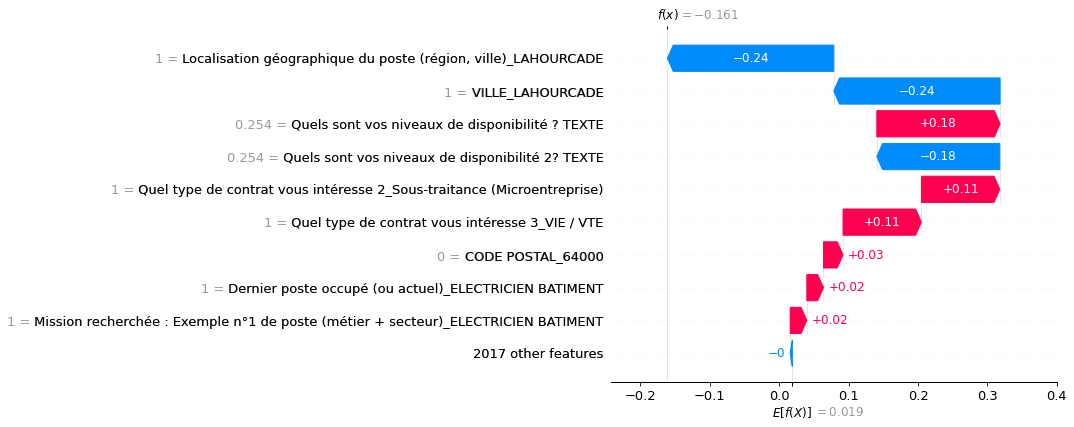

In [549]:
shap.plots.waterfall(shap_values[10])

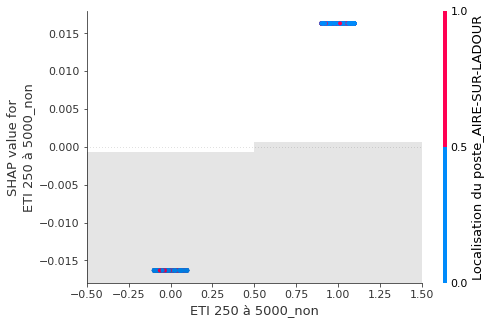

In [543]:
shap.plots.scatter(shap_values[:,"ETI 250 à 5000_non"], color=shap_values)

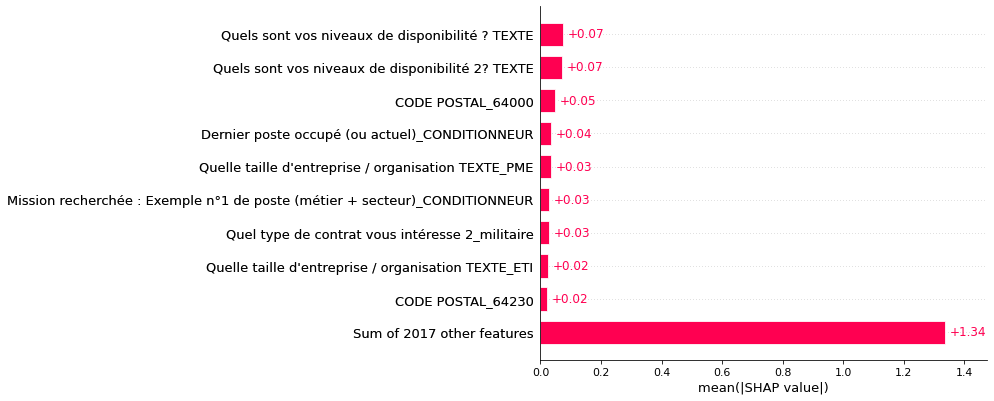

In [544]:
shap.plots.bar(shap_values)

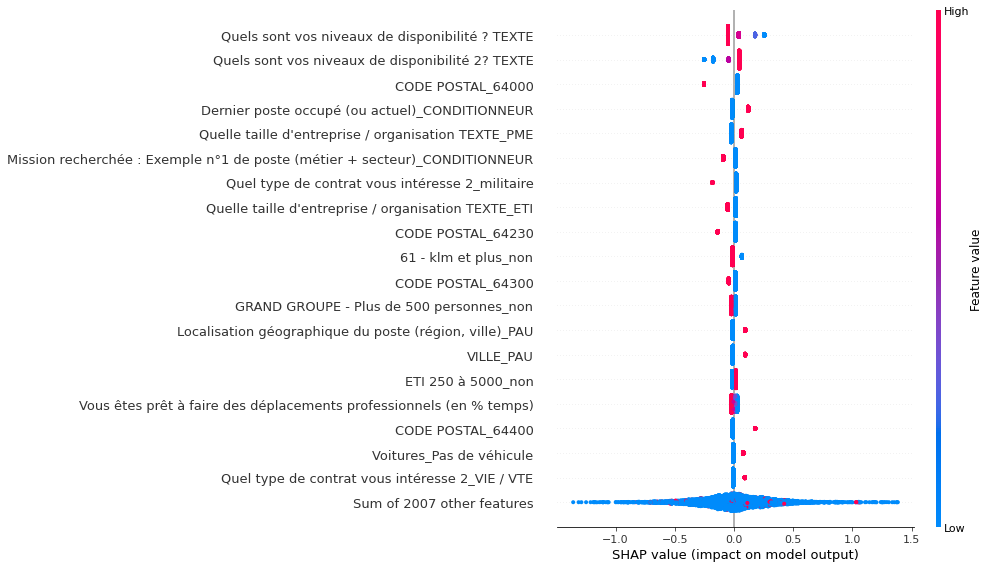

In [545]:
shap.plots.beeswarm(shap_values, max_display=20)